# 데이터 전처리

- 데이터를 분석하기에 좋은 형태로 만드는 과정
- Garbage In Garbage Out
    - 데이터 전처리가 중요한 근본적인 이유
    - 데이터 품질은 분석 결과 품질의 출발점
    
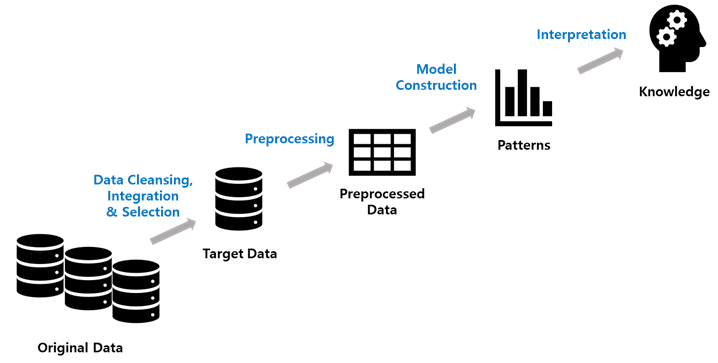

### 데이터 전처리의 필요성
- 데이터 품질이 높은 경우에도 전처리 필요
    - 구조적 형태가 분석 목적에 적합하지 않은 경우
    - 사용하는 툴, 기법에서 요구하는 데이터 형태
    - 데이터가 너무 많은 경우
    - 데이터 분석의 레벨이 데이터 저장 레벨과 다른 경우


- 데이터 품질을 낮추는 요인
    - 불완전(incomplete) : 데이터 필드가 비어 있는 경우
    - 잡음(noise) : 데이터에 오류가 포함된 경우
    - 모순(inconsistency) : 데이터 간 정합성, 일관성이 결여된 경우

### 데이터 전처리 주요 기법
- 데이터 정제
    - 결측치, 이상치, 잡음


- 데이터 결합


- 데이터 변환
    - Normalization, scaling


- 차원 축소
    - Feature selection
        - filter, wrapper, embedded
    - Feature extraction
        - PCA, SVD, FA, NMF


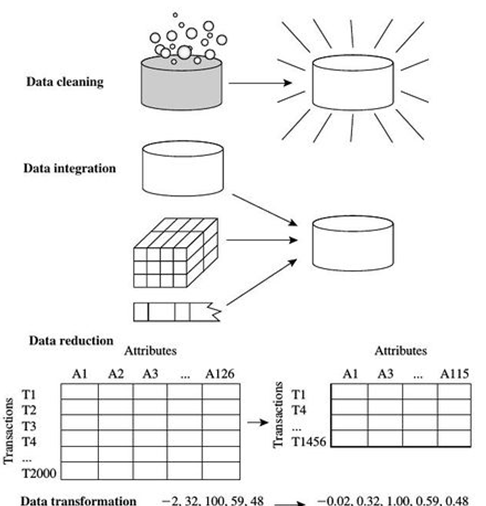

### 결측값(missing value) 처리
- 해당 데이터 행을 모두 제거(완전제거법)
- 수작업으로 채워 넣음
- 특정값 사용
- 핫덱(hot-deck) 대체법
    - 동일한 조사에서 다른 관측값으로부터 얻은 자료를 이용해 대체
    - 관측값 중 결측치와 비슷한 특성을 가진 것을 무작위 추출하여 대체
- 평균값 사용 (전체 평균 혹은 기준 속성 평균)
    - 표준오차 과소추정 발생
- 가장 가능성이 높은 값 사용 (회귀분석, 보간법 등)

## 데이터 인코딩

- 문자열을 숫자형으로 변환


- 인코딩 방식
    - 레이블 인코딩(Label encoding)
    - 원-핫 인코딩(One-hot encoding)

### 레이블 인코딩 (Label encoding)
- 문자열 데이터를 숫자로 코드화
- 범주형 자료의 수치화

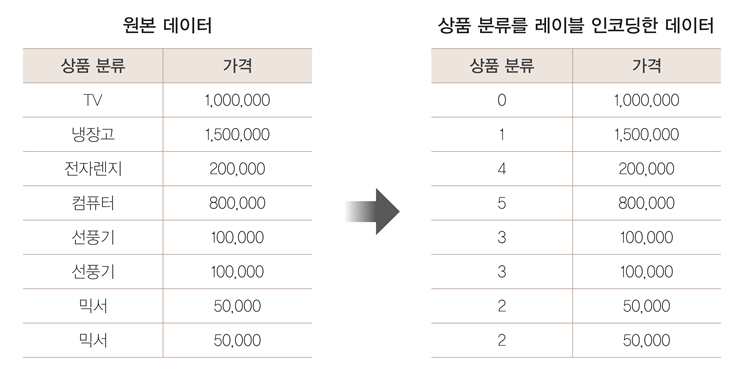

**사이킷런의 레이블 인코딩 클래스 : LabelEncoder**
1. LabelEncoder 객체 생성
2. fit() 메서드
    - 레이블 인코더를 맞춤
3. transform() 메서드
    - 인코딩된 레이블 반환

In [1]:
from sklearn.preprocessing import LabelEncoder


[0 1 4 5 3 3 2 2]


LabelEncoder 객체의 classes_ : 인코딩된 문자열 값 목록 확인

In [2]:
# 인코딩 전 원래의 값 확인 : encoder.classes_ 속성
print('인코딩 클래스:',encoder.classes_)

array(['TV', '냉장고', '믹서', '선풍기', '전자렌지', '컴퓨터'], dtype='<U4')

inverse_transform() : 인코딩된 값을 다시 디코딩

In [3]:
# 인코딩된 값 디코딩


array(['선풍기', 'TV', '믹서', '냉장고'], dtype='<U4')

레이블 인코딩 방식 주의
- 간단하게 문자열 값을 숫자형 값으로 변환하지만
- 이는 단순 코드일 뿐 크기와는 상관 없음
- 일부 ML 알고리즘에서 이를 적용할 경우 예측 성능이 떨어지는 경우 발생
- 숫자 값의 크기 특성이 작용하기 때문
- 즉, 냉장고가 1, 믹서가 2로 변환되면서 1 보다 2가 더 큰 값이므로 가중치가 부여되거나
- 더 중요하게 인식될 가능성 발생
- 이러한 특성 때문에 레이블 인코딩은 선형 회귀와 같은 ML 알고리즘에서는 적용하지 않음
- 트리 계열의 ML 알고리즘은 숫자의 이러한 특성을 반영하지 않으므로 레이블 인코딩 적용 시 문제 없음


### 원-핫 인코딩(One-Hot encoding)

- feature 값의 유형에 따라 새로운 feature를 추가하여
- 고유 값에 해당하는 컬럼만 1을 표시하고 나머지 컬럼에는 0을 표시

- 범주형 변수를 독립변수로 갖는 회귀분석의 경우 범주형 변수를 dummy 변수로 변환

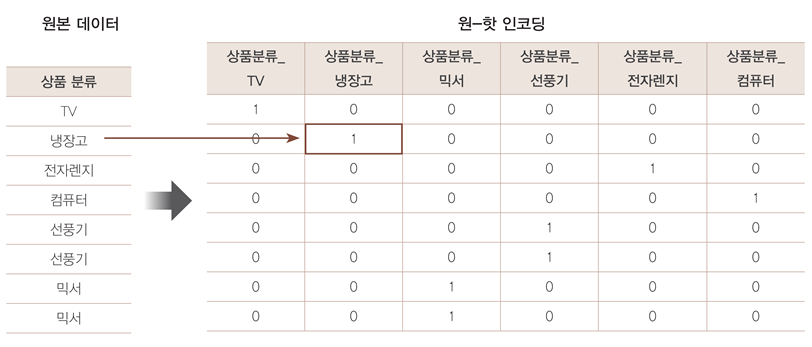

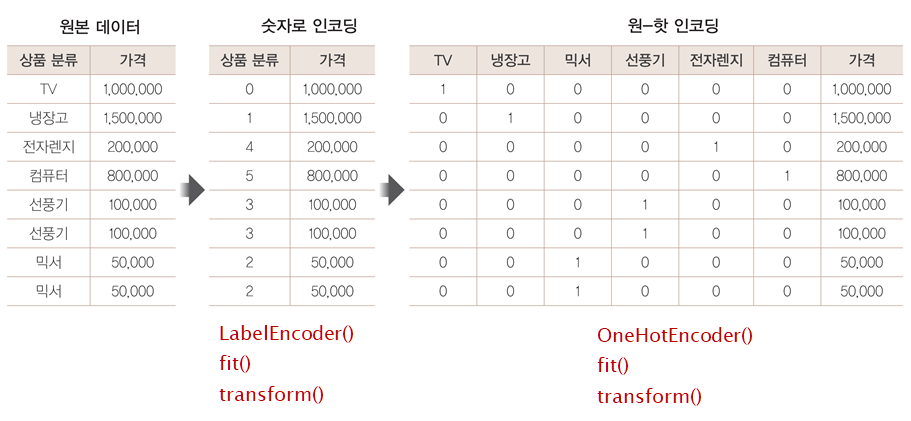

**사이킷런에서 원-핫 인코딩 클래스 : OneHotEncoder**

**원-핫 인코딩 변환 과정**
1. 문자열 값을 숫자형 값으로 변환
2. 입력 값을 2차원 데이터로 변환
3. OneHotEncoder 클래스로 원-핫 인코딩 적용
    - fit()
    - transform()

In [4]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import numpy as np

items=['TV','냉장고','전자렌지','컴퓨터','선풍기','선풍기','믹서','믹서']



array([0, 1, 4, 5, 3, 3, 2, 2])

In [5]:
# 2. 2차원 데이터로 변환


# 총 데이터 수 : 8
# 2차원 형태로 컬럼이 한 개, 행이 8개인 ndarray로 변환

# reshape()에서 -1 인자 : 자동 생성의 의미
# 10개의 데이터 : reshape(-1, 5)  
# - 컬럼 수 : 5 (고정)
# - 10개 데이터에서 컬럼이 5개로 고정되어 있으므로
# - 행의 수는 2
# - 2행 5열로 변환

# 10개의 데이터 : reshape(5, -1) 
# - 행의 수 : 5 고정
# - 컬럼 수 : 2
# - 5행 2열로 변환

array([[0],
       [1],
       [4],
       [5],
       [3],
       [3],
       [2],
       [2]])

In [6]:
# 3. 원-핫 인코딩을 적용 


<8x6 sparse matrix of type '<class 'numpy.float64'>'
	with 8 stored elements in Compressed Sparse Row format>

- sparse matrix : 희소행렬 (행렬의 값이 대부분 0인 경우)

  (0, 0)	1.0
  (1, 1)	1.0
  (2, 4)	1.0
  (3, 5)	1.0
  (4, 3)	1.0
  (5, 3)	1.0
  (6, 2)	1.0
  (7, 2)	1.0


In [9]:
# 2차원 형태로 출력


array([[1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.]])

In [10]:
# 원-핫 인코딩 전체 과정

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import numpy as np

items=['TV','냉장고','전자렌지','컴퓨터','선풍기','선풍기','믹서','믹서']

# 1. 먼저 숫자값으로 변환을 위해 LabelEncoder로 변환 


# 2. 2차원 데이터로 변환합니다. 


# 3. 원-핫 인코딩을 적용합니다. 




원-핫 인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
원-핫 인코딩 데이터 차원
(8, 6)


### Pandas API 사용 원-핫 인코딩 수행
- get_dummies() 메서드 사용
- 숫자형으로 변환없이 바로 변환

In [10]:
import pandas as pd

df = pd.DataFrame({'item':['TV','냉장고','전자렌지','컴퓨터','선풍기','선풍기','믹서','믹서']})
df

,item
0,TV
1,냉장고
2,전자렌지
3,컴퓨터
4,선풍기
5,선풍기
6,믹서
7,믹서


,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자렌지,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


In [12]:
# Pandas 데이터프레임을 NumPy 배열로 변환


array([[1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0]], dtype=uint8)

### 피처 스케일링과 정규화

- 피처 스케일링(feature scaling)
    - 서로 다른 변수의 값 범위를 일정한 수준으로 맞춤


- 방식
    - Z-scaling
        - 표준화(standardization)
        - 평균이 0이고 분산이 1인 가우지안 정규분포로 변환
        - 정규화(Normalization)
        - sklearn.preprocessing의  StandardScaler 모듈

    - Min-max
        -  0~1로 변환
        - sklearn.preprocessing의  MinMaxScaler 모듈

    - 벡터 정규화
        - Sklearn의 Nomalizer 모듈
        - 선형대수의 정규화 개념
        - 개별 벡터의 크기를 맞추기 위해 모든 피처벡터의 크기로 나누어 변환

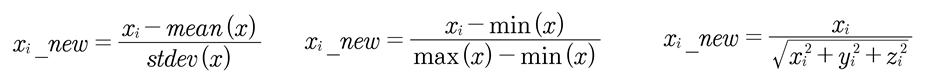

참고

사전에 표준화를 적용해야 하는 알고리즘
- 사이킷런에서 구현하는 RBF 커널을 이용하는 서프트 벡터 머신
- 선형 회귀
- 로지스틱 회귀 
- 이들 알고리즘은 데이터가 가우시난 분포를 가지고 있다고 가정하고 구현했기 때문에
- 사전에 표준화 적용을 함으로써
- 예측 성능을 향상시킬 수 있음

Radial Basis Function (RBF) : 방사형 기저 함수
- 점이 중심으로부터의 거리로 정의되는 단순한 함수

서포트 벡터 머신(SVM, Support Vector Machine)
- 주어진 데이터가 어느 카테고리에 속할지 판단하는 
- 이진 선형 분류 모델  

StandardScaler
* 표준화 지원 클래스
* 개별 피처를 평균이 0이고 분산이 1인 값으로 변환

### StandardScaler 사용 예제

In [18]:
from sklearn.datasets import load_iris
import pandas as pd
# 붓꽃 데이터 셋을 로딩하고 DataFrame으로 변환
i


sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64
sepal length (cm)    0.828066
sepal width (cm)     0.435866
petal length (cm)    1.765298
petal width (cm)     0.762238
dtype: float64


StandardScaler 이용 표준화해서 변환
1.  StandardScaler 객체 생성
2. fit() : 데이터 변환을 위한 기준 정보 설정
3. transform() : fit()에서 설정된 정보를 이용해 데이터 변환
    - scale 변환된 데이터 셋이 numpy ndarry로 반환

In [21]:
# StandardScaler 이용 표준화해서 변환

from sklearn.preprocessing import StandardScaler


sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64
sepal length (cm)    1.00335
sepal width (cm)     1.00335
petal length (cm)    1.00335
petal width (cm)     1.00335
dtype: float64


MinMaxScaler
* 데이터값을 0과 1사이의 범위 값으로 변환
* 음수인 경우 -1에서 1사이의 값으로 변환
* 데이터의 분포가 가우시안 분포가 아닌 경우 Min, Max Scale 적용 가능

MinMaxScaler 이용 변환
1. MinMaxScaler 객체 생성
2. fit()
3. transform() : scale 변환된 데이터 셋이 numpy ndarry로 반환

In [25]:
from sklearn.preprocessing import MinMaxScaler



sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

In [ ]:
################### 참고 : fit_transform() 이용 ########################

In [ ]:
# StandardScaler에서 fit_transform() 이용

from sklearn.preprocessing import StandardScaler

# StandardScaler객체 생성
scaler = StandardScaler()
# StandardScaler 로 데이터 셋 변환. fit_transform() 호출.  
iris_scaled = scaler.fit_transform(iris_df)# numpy ndarry로 반환

# numpy ndarry를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature 들의 평균 값')
print(iris_df_scaled.mean())
print('\nfeature 들의 분산 값')
print(iris_df_scaled.var())

# 모든 컬럼 값의 평균이 0에 아주 가까운 값으로,
# 분산은 1에 아주 가까운 값으로 변환
# 결과 동일

In [ ]:
# MinMaxScaler에서 fit_transform() 사용

from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler객체 생성
scaler = MinMaxScaler()
# MinMaxScaler 로 데이터 셋 변환. fit_transform() 호출.  
iris_scaled = scaler.fit_transform(iris_df)# numpy ndarry로 반환

# numpy ndarry를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature들의 최소 값')
print(iris_df_scaled.min())
print('\nfeature들의 최대 값')
print(iris_df_scaled.max())

# 모든 피처가 0 ~ 1 값으로 변환됨
# 결과 동일